In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from autorank import autorank, plot_stats

In [2]:
BUDGETS = [10, 30, 100, 300, 1000, 3000, 10000, 20000]
BUDGETS_3D = [10, 30, 100, 300, 1000, 3000, 10000, 30000]

FID_GROUPS = {"Seperable Functions": [*range(1,6)],
              "Low or moderate conditioning": [*range(6, 10)],
              "High conditioning and unimodal": [*range(10, 15)],
              "Multi-modal with adequate global structure": [*range(15, 20)],
              "Multi-modal with weak global structure": [*range(20, 25)]}

ALGO_NICKS = {'PSO' : 'PSO', 'COBYLARandomStart' : 'COBYLA', 'DiagonalCMA': 'dCMAES', 'RandomSearch' : 'RS',
       'NelderMeadRandomStart' : 'ND', 'DifferentialEvolution()' : 'DE', 'EMNA()' : 'EMNA'}

# Dimension 2

In [3]:
df = pd.read_csv("results/all_algorithms_2d.csv")
df['optimizer_name'] = df['optimizer_name'].map(ALGO_NICKS)
df_median = (df
             .groupby(["budget", "function_class", "func", "optimizer_name"])
             .median(numeric_only=True)
             .reset_index())


df_new = pd.read_csv("results/NewFuncs_2d.csv")
df_new['optimizer_name'] = df_new['optimizer_name'].map(ALGO_NICKS)
df_new_median = (df_new
                 .groupby(["budget", "rep", "func", "optimizer_name"])
                 .median(numeric_only=True)
                 .reset_index())
df_new_best = (df_new
 .query("(func == 0) & (rep == 0) or (func == 1) & (rep == 0) or (func == 2) & (rep == 4) or (func == 3) & (rep == 4) or (func == 4) & (rep == 0)"))



# Dimension 3

In [4]:
df_3d = pd.read_csv("results/all_algorithms_3d.csv")
df_3d['optimizer_name'] = df_3d['optimizer_name'].map(ALGO_NICKS)
df_3d_median = (df_3d
                .groupby(["budget", "function_class", "func", "optimizer_name"])
                .median()
                .reset_index())


df_new_3d = pd.read_csv("results/NewFuncs_3d.csv")
df_new_3d['optimizer_name'] = df_new_3d['optimizer_name'].map(ALGO_NICKS)
df_new_3d_median = (df_new_3d
                 .groupby(["budget", "rep", "func", "optimizer_name"])
                 .median(numeric_only=True)
                 .reset_index())

# Paper Plot 1

Rejecting null hypothesis that data is normal for column COBYLA (p=0.001357<0.007143)
Rejecting null hypothesis that data is normal for column DE (p=0.001362<0.007143)
Rejecting null hypothesis that data is normal for column EMNA (p=0.000000<0.007143)
Fail to reject null hypothesis that data is normal for column ND (p=0.015613>=0.007143)
Fail to reject null hypothesis that data is normal for column PSO (p=0.013666>=0.007143)
Rejecting null hypothesis that data is normal for column RS (p=0.001338<0.007143)
Rejecting null hypothesis that data is normal for column dCMAES (p=0.001301<0.007143)
Using Levene's test for homoscedacity of non-normal data.
Fail to reject null hypothesis that all variances are equal (p=0.498212>=0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000001)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance

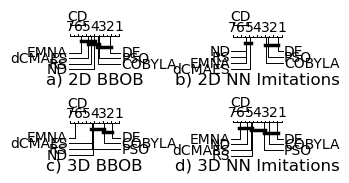

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(3.327835362, 1.8))
#width: 7.00697
#heigth: 8.66367
BBOB = (df_median
            .query(f"(function_class == 'BBOBFunction') & (budget == 20000)")
            .pivot(index=["budget", "function_class", "func"], columns="optimizer_name", values="loss"))
NN = (df_median
        .query(f"(function_class == 'NNFunction') & (budget == 20000)")
        .pivot(index=["budget", "function_class", "func"], columns="optimizer_name", values="loss"))


BBOB_3d = (df_3d_median
        .query(f"(function_class == 'BBOBFunction') & (budget == 30000)")
        .pivot(index=["budget", "function_class", "func"], columns="optimizer_name", values="loss"))
NN_3d = (df_3d_median
      .query(f"(function_class == 'NNFunction') & (budget == 30000)")
      .pivot(index=["budget", "function_class", "func"], columns="optimizer_name", values="loss"))

plot_stats(autorank(BBOB, alpha=.05, order="ascending", verbose=True), ax=ax[0, 0])
plot_stats(autorank(NN, alpha=.05, order="ascending", verbose=True), ax=ax[0, 1])
plot_stats(autorank(BBOB_3d, alpha=.05, order="ascending", verbose=True), ax=ax[1, 0])
plot_stats(autorank(NN_3d, alpha=.05, order="ascending", verbose=True), ax=ax[1, 1])
ax[0, 0].set_title("a) 2D BBOB", y=-0.3)
ax[0, 1].set_title("b) 2D NN Imitations", y=-0.3)
ax[1, 0].set_title("c) 3D BBOB", y=-0.3)
ax[1, 1].set_title("d) 3D NN Imitations", y=-0.3)

plt.rcParams.update({'font.size': 5})

#ax[1, 1].set_title(f"NN Budget: {budget}")

fig.tight_layout()
#fig.savefig("results/CDPlot1_small.png", dpi=300)

# Paper Plot 2

Rejecting null hypothesis that data is normal for column COBYLA (p=0.000000<0.007143)
Rejecting null hypothesis that data is normal for column DE (p=0.000000<0.007143)
Rejecting null hypothesis that data is normal for column EMNA (p=0.000000<0.007143)
Rejecting null hypothesis that data is normal for column ND (p=0.000000<0.007143)
Rejecting null hypothesis that data is normal for column PSO (p=0.000000<0.007143)
Rejecting null hypothesis that data is normal for column RS (p=0.000000<0.007143)
Rejecting null hypothesis that data is normal for column dCMAES (p=0.000000<0.007143)
Using Levene's test for homoscedacity of non-normal data.
Fail to reject null hypothesis that all variances are equal (p=0.915098>=0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.
Rejecting 

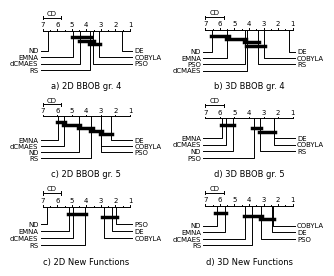

In [6]:
BBOB_2d_4 = (df
             .query(f"func in {FID_GROUPS['Multi-modal with adequate global structure']}")
             .query(f"function_class == 'BBOBFunction'")
             .query(f"budget == 20000")
             .pivot(index=["budget", "function_class", "func", "seed"], columns="optimizer_name", values="loss"))
BBOB_2d_5 = (df
             .query(f"func in {FID_GROUPS['Multi-modal with weak global structure']}")
             .query(f"function_class == 'BBOBFunction'")
             .query(f"budget == 20000")
             .pivot(index=["budget", "function_class", "func", "seed"], columns="optimizer_name", values="loss"))
NN_2d = (df_new_best
         .query(f"budget == 20000")
         .pivot(index=["budget", "function_class", "func", "seed"], columns="optimizer_name", values="loss"))

BBOB_3d_4 = (df_3d
             .query(f"func in {FID_GROUPS['Multi-modal with adequate global structure']}")
             .query(f"function_class == 'BBOBFunction'")
             .query(f"budget == 30000")
             .pivot(index=["budget", "function_class", "func", "seed"], columns="optimizer_name", values="loss"))
BBOB_3d_5 = (df_3d
             .query(f"func in {FID_GROUPS['Multi-modal with weak global structure']}")
             .query(f"function_class == 'BBOBFunction'")
             .query(f"budget == 30000")
             .pivot(index=["budget", "function_class", "func", "seed"], columns="optimizer_name", values="loss"))
NN_3d = (df_new_3d
     .query(f"budget == 30000")
     .pivot(index=["budget", "function_class", "func", "seed", "rep"], columns="optimizer_name", values="loss"))



fig, ax = plt.subplots(3, 2, figsize=(3.327835362, 2.7))

plot_stats(autorank(BBOB_2d_4, alpha=.05, order="ascending", verbose=True), ax=ax[0, 0])
plot_stats(autorank(BBOB_3d_4, alpha=.05, order="ascending", verbose=True), ax=ax[0, 1])
plot_stats(autorank(BBOB_2d_5, alpha=.05, order="ascending", verbose=True), ax=ax[1, 0])
plot_stats(autorank(BBOB_3d_5, alpha=.05, order="ascending", verbose=True), ax=ax[1, 1])
plot_stats(autorank(NN_2d, alpha=.05, order="ascending", verbose=True), ax=ax[2, 0])
plot_stats(autorank(NN_3d, alpha=.05, order="ascending", verbose=True), ax=ax[2, 1])
ax[0, 0].set_title("a) 2D BBOB gr. 4", y=-0.3)
ax[0, 1].set_title("b) 3D BBOB gr. 4", y=-0.3)
ax[1, 0].set_title("c) 2D BBOB gr. 5", y=-0.3)
ax[1, 1].set_title("d) 3D BBOB gr. 5", y=-0.3)
ax[2, 0].set_title("c) 2D New Functions", y=-0.3)
ax[2, 1].set_title("d) 3D New Functions", y=-0.3)
fig.tight_layout()
plt.rcParams.update({'font.size': 5})

#fig.savefig("results/CDplot2_small.png", dpi=300)